In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet.AutoUnet import *
from NN_library.AutoUnet.train_AutoUnet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [2]:
data = dataset_seq()
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
loaders = get_loaders(data, 16)

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [4]:
name = 'NN_library/AutoUnet/AutoUnet'
args = {'lr' : 0.00005, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [5]:
unet = AutoUNet()

In [6]:
torch.cuda.empty_cache() 

In [7]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 7697345


In [8]:
unet = load_network(unet, args['name']+'_19', args)

In [9]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  15027.0355491638
Epoch: 0 batch: 100 mean train loss:  14226.8063887656
Epoch: 0 batch: 200 mean train loss:  14240.0445614159
Epoch: 0 batch: 300 mean train loss:  18067.4213230498
Epoch: 0 batch: 400 mean train loss:  14303.7614060895
Epoch: 0 batch: 500 mean train loss:  16288.1878114358
Epoch: 0 batch: 600 mean train loss:  15238.2816605978
Epoch: 0 batch: 700 mean train loss:  14668.2282432086
Epoch: 0 mean train loss:  15028.1613622214 mean val. rec. loss:  16238.2910156250
Epoch: 1 batch: 0 mean train loss:  17775.4808197021
Epoch: 1 batch: 100 mean train loss:  15295.5010280609
Epoch: 1 batch: 200 mean train loss:  14856.2554132938
Epoch: 1 batch: 300 mean train loss:  14486.1624903381
Epoch: 1 batch: 400 mean train loss:  14256.0294178277
Epoch: 1 batch: 500 mean train loss:  14203.2727801092
Epoch: 1 batch: 600 mean train loss:  16703.4937385439
Epoch: 1 batch: 700 mean train loss:  14760.2364911912
Epoch: 1 mean train loss:  14978.17721418

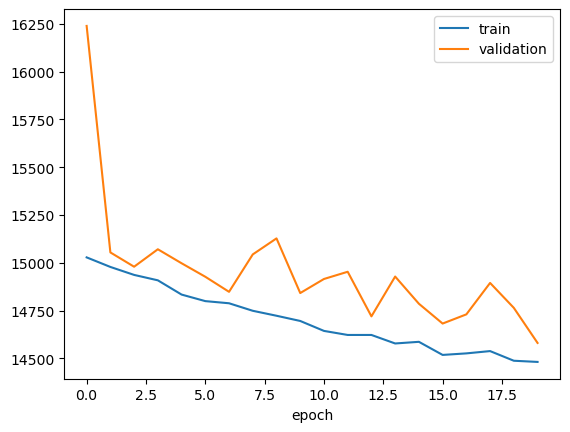

In [10]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])